In [27]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
import seaborn as sns

In [29]:
#Filter for Data Analyst roles in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values in 'salary_year_avg' for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

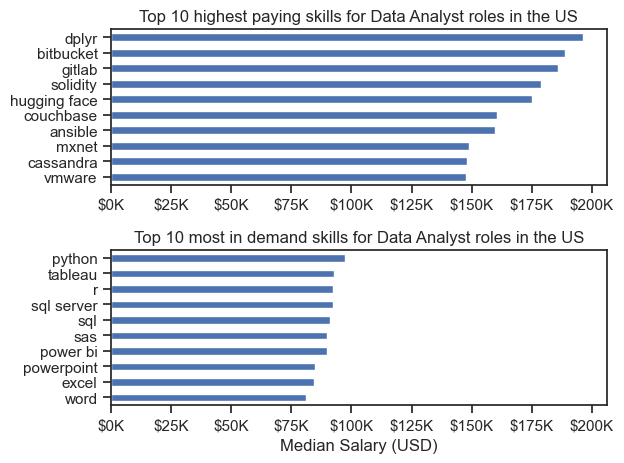

In [30]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

fig, ax = plt.subplots(2, 1)

# Top 10 highest paying skills for Data Analyst roles in the US 
df_DA_US_top_pay[::-1].plot(kind = 'barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 highest paying skills for Data Analyst roles in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 most in demand skills for Data Analyst roles in the US
df_DA_US_skills[::-1].plot(kind = 'barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in demand skills for Data Analyst roles in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()


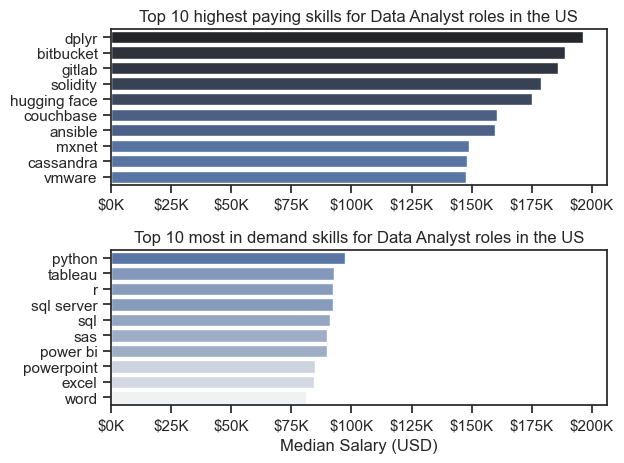

In [31]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

# Top 10 highest paying skills for Data Analyst roles in the US 
sns.barplot(data=df_DA_US_top_pay, x='median', y= df_DA_US_top_pay.index, ax=ax[0],hue='median', palette='dark:b_r')
ax[0].legend_.remove()

#df_DA_US_top_pay[::-1].plot(kind = 'barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 highest paying skills for Data Analyst roles in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 most in demand skills for Data Analyst roles in the US
sns.barplot(data=df_DA_US_skills, x='median', y= df_DA_US_skills.index, ax=ax[1],hue='median', palette='light:b')
ax[1].legend_.remove()

#df_DA_US_skills[::-1].plot(kind = 'barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in demand skills for Data Analyst roles in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()


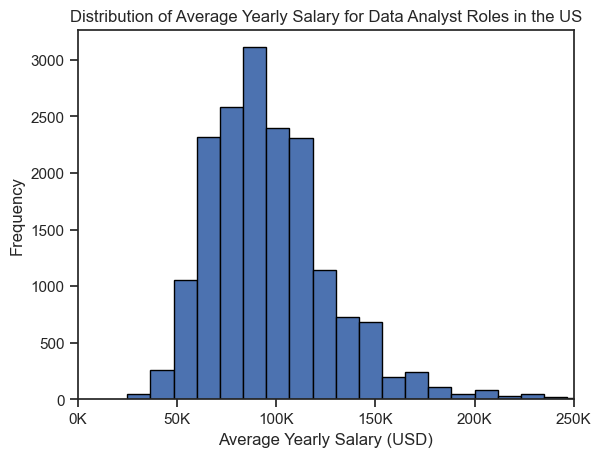

In [32]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.title('Distribution of Average Yearly Salary for Data Analyst Roles in the US')
plt.xlabel('Average Yearly Salary (USD)')       
plt.ylabel('Frequency')
plt.show()

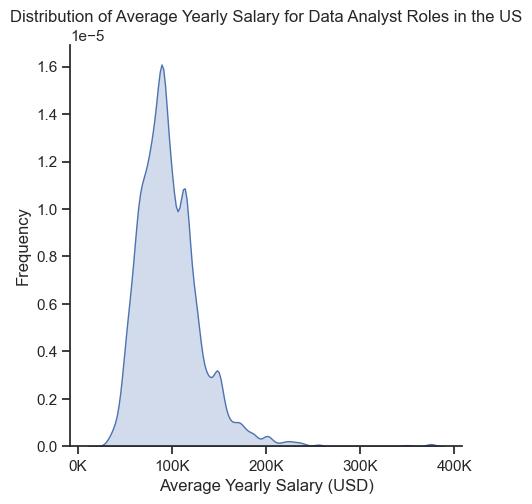

In [33]:
sns.set_theme(style="ticks")
sns.displot(data=df_DA_US, x='salary_year_avg', kind='kde', fill=True )
plt.title('Distribution of Average Yearly Salary for Data Analyst Roles in the US')
plt.xlabel('Average Yearly Salary (USD)')       
plt.ylabel('Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_9864\1726311786.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert=False)


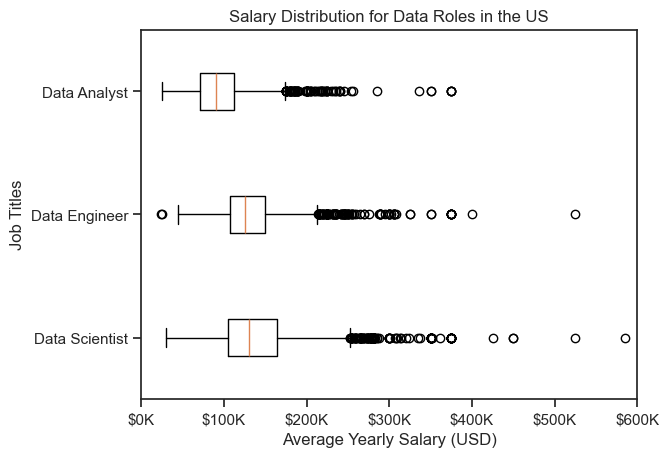

In [34]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert=False)
plt.title('Salary Distribution for Data Roles in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Titles')

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

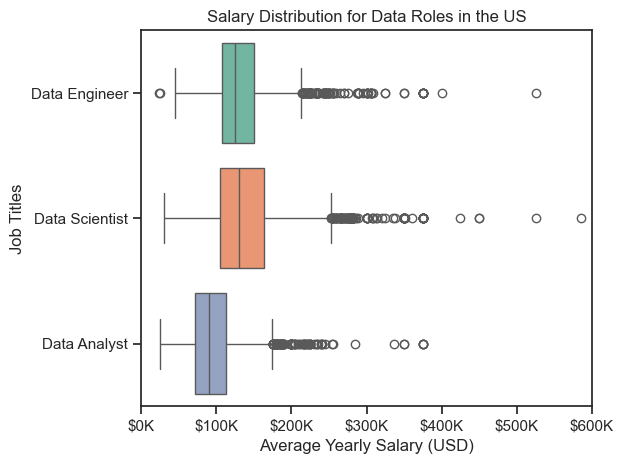

In [40]:
# Set seaborn theme
sns.set_theme(style="ticks")

# Create the boxplot
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short',hue='job_title_short',palette='Set2')

# Set plot title and axis labels
plt.title('Salary Distribution for Data Roles in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Titles')

# Set x-axis limits
plt.xlim(0, 600000)

# Format x-axis ticks as $XXXK
formatter = FuncFormatter(lambda x, pos: f'${int(x / 1000)}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
